# 微分(Differentiation)

## 繪圖函數

In [1]:
from matplotlib import pyplot as plt

def create_plot(f):
    x = list(range(0, 11))

    # Use the function to get the y values
    y = [f(i) for i in x]

    # Set up the graph
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid()

    # Plot the function
    plt.plot(x,y, color='green')

## $\begin{equation}f(x) = x^{2} + 3x\end{equation}$

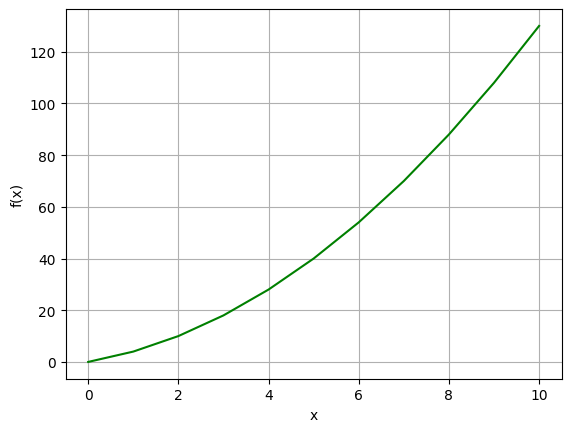

In [2]:
# 測試 
f = lambda x: x**2 + 3*x
create_plot(f)

## 使用任兩點計算變化率
### $\begin{equation}m = \frac{\Delta{f(x)}}{\Delta{x}} \end{equation}$
### $\begin{equation}m = \frac{f(x2) - f(x1)}{x_{2} - x_{1}} \end{equation}$
### $\begin{equation}m = \frac{f(6) - f(4)}{6 - 4} \end{equation}$

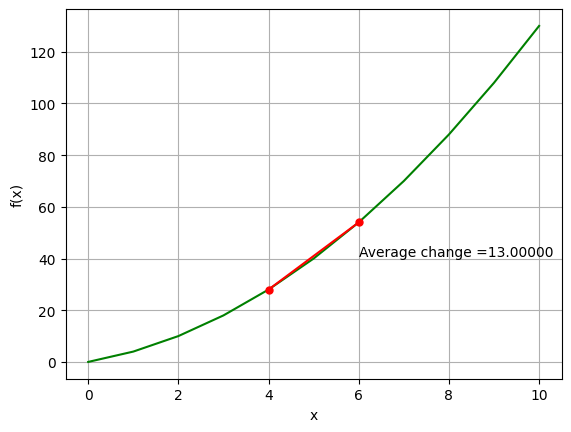

In [3]:
import numpy as np

def draw_slope(f, x1, x2, extend=False):
    y1, y2 = f(x1), f(x2)

    # 斜率
    m = (y2 - y1)/(x2 - x1)

    create_plot(f)

    # Create an array of x values for the secant line
    sx = np.array([x1,x2])
    sy = [f(i) for i in sx]

    # 斜率線
    if not extend:
        plt.plot(sx,sy, color='red', marker='o', markersize='5')
    else:
        m = (y2-y1)/(x2-x1)
        xMin = x1 - 3
        yMin = y1 - (3*m)
        xMax = x1 + 3
        yMax = y1 + (3*m)
        plt.plot([xMin,xMax],[yMin,yMax], color='red')

    # 註解
    plt.annotate(f'Average change ={m:.5f}',(x2, (y2+y1)/2))

x1, x2 = 4, 6
draw_slope(f, x1, x2)
plt.show()

## 取相近的兩個點計算x = 5變化率
## 兩點相連的直線，幾近函數的切線

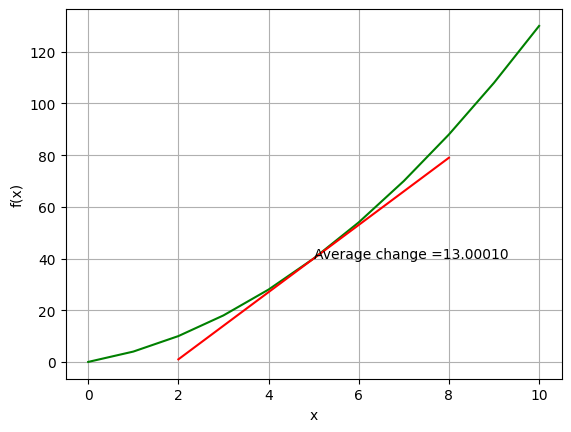

In [4]:
x1, x2 = 5, 5.0001
draw_slope(f, x1, x2, True)
plt.show()

## 導數(Derivative)：計算極相近兩個點的變化率。
### 公式：
### $\begin{equation}m = \frac{\Delta{f(x)}}{\Delta{x}} \end{equation}$
### $\begin{equation}m = \frac{f(x + h) - f(x)}{h} \end{equation}$
### $\begin{equation}\lim_{h \to 0} \frac{f(x + h) - f(x)}{h} \end{equation}$
### $\begin{equation}f'(x) = \frac{d}{dx}f(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} \end{equation}$

## 實作：計算導數 f'(2)。
### $\begin{equation}f(x) = x^{2} + x\end{equation}$

### $\begin{equation}f'(a) = \lim_{h \to 0} \frac{f(a + h) - f(a)}{h} \end{equation}$
### $\begin{equation}f'(\textbf{2}) = \lim_{h \to 0} \frac{f(\textbf{2} + h) - f(\textbf{2})}{h} \end{equation}$
### $\begin{equation}f'(2) = \lim_{h \to 0} \frac{((2+h)^{2} + 2 + h) - (2^{2} + 2)}{h} \end{equation}$
### $\begin{equation}f'(2) = \lim_{h \to 0} \frac{(4 + h^{2} + 4h + 2 + h) - (2^{2} + 2)}{h} \end{equation}$
### $\begin{equation}f'(2) = \lim_{h \to 0} \frac{(4 + h^{2} + 4h + 2 + h) - 6}{h} \end{equation}$
### $\begin{equation}f'(2) = \lim_{h \to 0} \frac{(h^{2} + 5h + 6) - 6}{h} \end{equation}$
### $\begin{equation}f'(2) = \lim_{h \to 0} \frac{h^{2} + 5h}{h} \end{equation}$
### $\begin{equation}f'(2) = \lim_{h \to 0} h + 5 \end{equation}$

### *h* 趨近於0:
### $\begin{equation}f'(2) = 5 \end{equation}$

## 可微性(Differentiability)
### - 在微分的點，函數要連續。
### - 切線不能為垂直線，否則斜率為 $\infty$。
### - 在微分的點，函數須為平滑曲線。
### 下圖為不可微：

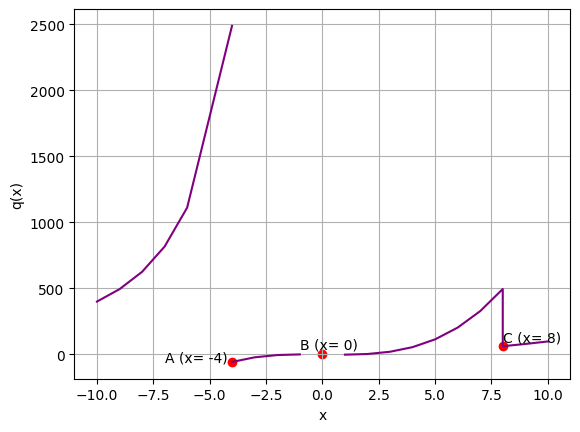

In [5]:
# Define function q
def q(x):
    if x != 0:
        if x < -4:
            return 40000 / (x**2)
        elif x < 8:
            return (x**2 - 2) * x - 1
        else:
            return (x**2 - 2)


# Plot output from function g
from matplotlib import pyplot as plt

# Create an array of x values
x = list(range(-10, -5))
x.append(-4.01)
x2 = list(range(-4,8))
x2.append(7.9999)
x2 = x2 + list(range(8,11))

# Get the corresponding y values from the function
y = [q(i) for i in x]
y2 = [q(i) for i in x2]

# Set up the graph
plt.xlabel('x')
plt.ylabel('q(x)')
plt.grid()

# Plot x against q(x)
plt.plot(x,y, color='purple')
plt.plot(x2,y2, color='purple')


plt.scatter(-4,q(-4), c='red')
plt.annotate('A (x= -4)',(-5,q(-3.9)), xytext=(-7, q(-3.9)))

plt.scatter(0,0, c='red')
plt.annotate('B (x= 0)',(0,0), xytext=(-1, 40))

plt.scatter(8,q(8), c='red')
plt.annotate('C (x= 8)',(8,q(8)), xytext=(8, 100))

plt.show()

#### A、B：不連續(non-continuous)。
#### C：切線為垂直線，且非平滑曲線。

# 導數計算定理(Derivative Rules and Operations)
### - f(x) = 常數  ==> f'(x) = 0
### - 次方：$\begin{equation}f(x) = x^{n} \;\; \therefore \;\; f'(x) = nx^{n-1}\end{equation}$
### - 函數：f(x) = Cg(x)  ==> f'(x) = Cg'(x)
### - 兩個函數：f(x) = g(x) + h(x)  ==> f'(x) = g'(x) + h'(x)
### - 乘積：$\begin{equation}\frac{d}{dx}[f(x)g(x)] = f'(x)g(x) + f(x)g'(x) \end{equation}$
### - 商：$\begin{equation}r(x) = \frac{s(x)}{t(x)} \end{equation}$ ==> $\begin{equation}r'(x) = \frac{s'(x)t(x) - s(x)t'(x)}{[t(x)]^{2}} \end{equation}$
### - 連鎖律(Chain Rule)：$\begin{equation}\frac{d}{dx}[o(i(x))] = o'(i(x)) \cdot i'(x)\end{equation}$

# SymPy 微分

In [6]:
# %pip install -U sympy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# 3x^2 + 2
from sympy import Symbol, lambdify
import numpy as np
# 
x = Symbol('x') # 
y = 3 *x**2 + 2 
yprime = y.diff(x) # 
yprime

6*x

In [ ]:
# 帶入數值
yprime.subs({x:2}) # 

12

In [9]:
# 3x^3 + 2x
x = Symbol('x')
y = 3 *x**3 + 2 * x
yprime = y.diff(x)
yprime

9*x**2 + 2

In [10]:
yprime.subs({x:2})

38

In [11]:
# 多點
f = lambdify(x, yprime, 'numpy')
f(np.arange(5))

array([  2,  11,  38,  83, 146])

In [12]:
# 多點
f = lambdify(x, yprime, 'numpy')
f(np.array([2,4]))

array([ 38, 146])

In [13]:
# 複雜的微分
from sympy import *

x = Symbol('x')
y = sin(x)* E ** (-0.1*(x-0.6)**2)
yprime = y.diff(x)
yprime

(0.12 - 0.2*x)*exp(-0.1*(x - 0.6)**2)*sin(x) + exp(-0.1*(x - 0.6)**2)*cos(x)

In [14]:
yprime.subs({x:2})

0.822012234678187*cos(2) - 0.230163425709892*sin(2)

In [15]:
yprime.subs({x:2}).evalf()

-0.551364801811764